# Laboratório 3 -- Geometria de múltiplas vistas
## INF0417 -- Visão Computacional
### Ms. Nigel Dias (Synkar Autonomous) e Prof. Dr. Aldo Díaz (INF/UFG)

# **1. Primitivas geométricas e transformações projetivas**

Antes de começarmos a analisar e manipular imagens de forma inteligente precisamos:
1. Estabelecer um vocabulário para descrever a **geometria da cena**.
2. Entender o **processo de formação da imagem**, levando em consideração informações como a geometria da cena e a ótica da câmera. 

Analisando a imagem abaixo, o que vocês conseguem inferir sobre a sua geometria?

![paralel_lines](figures/paralel_lines.jpg)

**Resposta:** 

## **1.1. Espaço Projetivo**

O processo de formação de imagem pode ser caracterizado como uma transformação projetiva que mapeia pontos 3D de uma cena real para pontos 2D no plano de imagem. A geometria Projetiva permite representar os efeitos de perspectiva e diferente da geometria Euclidiana, onde retas paralelas nunca se cruzam, na geometria Projetiva a interseção dessas linhas pode ser representada por um ponto no infinito.

![paralel_lines](figures/projetive.png)

O espaço Euclidiano $\mathbb{R}^{n}$ pode ser estendido para o espaço Projetivo $\mathbb{P}^{n}$ representando as entidades geométricas em coordenadas homogêneas. As coordenadas homogêneas de uma entidade geométrica são invariantes a multiplicação por um escalar $w \neq 0$. Deste modo um ponto cartesiano $(X,Y)^T$ corresponde à uma infinidade de triplas $(wX, wY, w)^T$. Pontos cujo $w = 0$, representam pontos no infinito e não possuem representação em coordenadas Euclidianas $\mathbb{R}^{n}$. Pontos em coordenadas homogêneas podem ser convertidos em coordenadas não homogêneas dividindo seus termos pelo último elemento:

$\begin{pmatrix}
\tilde{x} \\
\tilde{y} \\
\tilde{w}
\end{pmatrix}=\tilde{w}\begin{pmatrix}
x \\
y \\
1\end{pmatrix}$

Considerando o que foi visto no último lab e o que vimos até agora, qual é a importância de estudarmos features do tipo canto?

**Resposta:** 

## **1.2. Transformações**
Nas transformações projetivas algumas propriedades como dimensões e ângulos podem ser distorcidas ou até perdidas, contudo as linhas retas continuam sendo linhas retas. 

![2d_transform](figures/2d_transform.png)

A translação 2D pode ser representada como $\mathbf{\mathrm{x}}' = \mathbf{\mathrm{x}} + \mathbf{\mathrm{t}}$ sendo $\mathbf{\mathrm{t}}$ um vector de duas dimensões, ou na forma matricial

$
\mathbf{\mathrm{x}}' =
\begin{bmatrix}
\mathbf{\mathrm{I}} & \mathbf{\mathrm{t}}
\end{bmatrix}
\tilde{\mathbf{\mathrm{x}}}
$

Outro aspecto interessante de trabalhar em coordenadas homogêneas é que ela permite o encadeamento de transformações a partir de multiplicações matriciais. A matriz pode ser convertida em coordenadas homogêneas adicionando a linha $[\mathbf{\mathrm{0}^{T}}~\mathbf{\mathrm{1}}]$

$
\tilde{\mathbf{\mathrm{x}}}' =
\begin{bmatrix}
\mathbf{\mathrm{I}} & \mathbf{\mathrm{t}} \\
\mathbf{\mathrm{0}^{T}} & 1
\end{bmatrix}
\tilde{\mathbf{\mathrm{x}}}
$


A transformação Euclidiana por sua vez consiste numa rotação acompanhada de uma translação, $\mathbf{\mathrm{x}}' = \mathbf{\mathrm{R}}\mathbf{\mathrm{x}}\mathbf{\mathrm{t}}$ , com representação matricial na forma

$
\tilde{\mathbf{\mathrm{x}}}' =
\begin{bmatrix}
\mathbf{\mathrm{R}} & \mathbf{\mathrm{t}} \\
\mathbf{\mathrm{0}^{T}} & 1
\end{bmatrix}
\tilde{\mathbf{\mathrm{x}}}
$

em que 

$
\mathbf{\mathrm{R}} =
\begin{bmatrix}
\mathrm{cos}\theta  & -\mathrm{sen}\theta \\
\mathrm{sen}\theta & \mathrm{cos}\theta
\end{bmatrix}
$

A tabela abaixo apresenta a hierarquia de transformações 2d, de modo que a transformação descrita em uma linha é uma generalização da anterior. 

![2d_transform_hierarch](figures/2d_transform_hierarch.png)

### **1.2.1. Transformação homográfica**
A transformação homográfica, às vezes denominada como transformação de perspectiva, relaciona a transformação entre dois planos. Em outras palavras, é um mapeamento entre duas projeções planares de uma imagem.

![homography](figures/homography.png)


Matematicamente ela é representada por uma matriz de transformação  $3 \times3$ em coordenadas homogêneas. 

$
\begin{bmatrix}
x' \\
y' \\
1 
\end{bmatrix}=H\begin{bmatrix}
x\\ 
y \\
1
\end{bmatrix}=\begin{bmatrix}
h_{11} & h_{12} & h_{13}\\ 
h_{21} & h_{22} & h_{23}\\ 
h_{31} & h_{32} & h_{33}
\end{bmatrix}\begin{bmatrix}
x\\ 
y \\
1
\end{bmatrix}
$

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (15,8)

img1 = cv.imread('dataset/book.png',0)         
img2 = cv.imread('dataset/book_in_scene.png',0) 

#
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

#
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
matches = bf.match(des1,des2)

#
good = []
for m in matches:
    if m.distance < 100:
        good.append(m)

#
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
H, mask = cv.findHomography(src_pts, dst_pts)

#
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv.perspectiveTransform(pts,H)


img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3, 'gray')
plt.show()

ModuleNotFoundError: No module named 'cv2'

# **2. Geometria de câmera**
## **2.1. Modelo Pinhole**

O modelo de câmera pinhole é um modelo matemático utilizado para representar o processo de mapeamento de pontos 3D do mundo real no plano de imagem. O modelo permite apresentar o processo projetivo a partir de transformações lineares semelhantes aos vistos anteriormente. 

![pinhole_model](figures/pinhole_model.png)


Apesar de ser um modelo simples, ele provê uma aproximação aceitável do processo de formação de imagem.
Neste modelo um **ponto no espaço** $\mathbf{\mathrm{X}}=(\mathrm{X}, \mathrm{Y}, \mathrm{Z})^T$ é projetado no **plano de imagem** a partir do raio que passa pelo ponto e o centro da câmera:

![pinhole_proj](figures/pinhole_proj.png)

Por semelhança de triângulos é facilmente mapeado para o plano de imagem:

$\begin{pmatrix}
\mathrm{X} \\
\mathrm{Y} \\
\mathrm{Z}
\end{pmatrix}\rightarrow\begin{pmatrix}
f \mathrm{X}/\mathrm{Z} \\
f \mathrm{Y}/\mathrm{Z}
\end{pmatrix}
$

Para mapear o ponto 3D em coordenadas de pixel 2D, este mapeamento assume que a origem do sistema de coordenadas está no **ponto principal** (coordenadas do centro da imagem) e precisamos considerar o canto superior esquerdo como sendo a origem do sistema.
Assim o mapeamento fica da seguinte forma:

$
\begin{pmatrix}
\mathrm{X} \\
\mathrm{Y} \\
\mathrm{Z}
\end{pmatrix}
\rightarrow
\begin{pmatrix}
f \mathrm{X}/\mathrm{Z} + p_{x} \\
f \mathrm{Y}/\mathrm{Z} + p_{y}
\end{pmatrix}
$ ,

sendo $(p_{x},p_{y})^{T}$ as coordenadas do ponto principal. Essa expressão pode ser expressada de forma matricial utilizando coordenadas homogêneas

$\begin{pmatrix}
X \\ 
Y \\
Z \\ 
1
\end{pmatrix}\mapsto
\begin{pmatrix}
fX \\ 
fY \\ 
Z
\end{pmatrix}=
\begin{pmatrix}
f & 0 & p_{x} & 0 \\ 
0 & f & p_{y} & 0 \\ 
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
X \\ 
Y \\ 
Z\\ 
1
\end{pmatrix}$

ou na forma compacta $\mathbf{\mathrm{x}}=\mathbf{\mathrm{P}}\mathbf{\mathrm{X}}$, sendo $\mathbf{\mathrm{P}}$ definido como matriz de projeção e a **matriz de calibração da câmera** ou **matriz de parâmetros intrísecos da câmera**:

$    \mathbf{\mathrm{K}} = \begin{pmatrix}
f & 0 & p_{x} \\ 
0 & f & p_{y}\\ 
0 & 0 & 1
\end{pmatrix}$

Neste caso a matriz de projeção é definido como sendo $\mathbf{\mathrm{P}}=\mathbf{\mathrm{K}}[\mathbf{\mathrm{I}}~~\mathbf{\mathrm{0}}]$.

Como poderiamos estimar essa matriz de câmera?

**Resposta:** 

No geral pontos 3D são expressados em coordenadas do mundo, o correto é escrever a formulação anterior como sendo $\mathbf{\mathrm{x}}=\mathbf{\mathrm{K}}[\mathbf{\mathrm{I}} ~~ 0]\mathbf{\mathrm{X}_{cam}}$. Assim, tendo um ponto um no sistema de coordenadas do mundo este mesmo ponto em coordenadas de câmera é dado pela relação $\mathbf{\mathrm{X}}_{cam}=\mathbf{\mathrm{R}}(\mathbf{\mathrm{X}} - \mathbf{\mathrm{C}})$ sendo $\mathbf{\mathrm{C}}$ as coordenadas do centro da câmera no mundo 

$    \mathbf{\mathrm{X}}_{cam}=\begin{pmatrix}
\mathbf{\mathrm{R}} & -\mathbf{\mathrm{R}}\mathbf{\mathrm{C}} \\ 
0 & 1
\end{pmatrix}\begin{pmatrix}
X\\ 
Y\\ 
Z\\ 
1
\end{pmatrix}=\begin{pmatrix}
\mathbf{\mathrm{R}} & -\mathbf{\mathrm{R}}\mathbf{\mathrm{C}} \\ 
0 & 1
\end{pmatrix}\mathbf{\mathrm{X}}$

![cam_extrinsic](figures/extrinsic.png)

### **2.1.1. Calibração de câmera**

O modelo pinhole, ao contrário das câmeras reais, não possui lentes e desconsidera a ocorrência de distorções não-lineares, o que o torna um modelo ideal e matematicamente conveniente. As lentes podem introduzir distorções consideráveis nas imagens que precisam ser removidas antes de realizar qualquer operação usando o modelo matemático pinhole. 

![distortion](figures/distortion.jpg)

Existem dois principais tipos de distorção: distorção radial e a distorção tangencial. A distorção radial faz com que linhas retas aprendam ser curvas, ela pode ser representada da seguinte forma

$x_{dist}=x(1+k_{1}r^{2} +k_{2}r^{4}+k_{3}r^{6})$

$y_{dist}=y(1+k_{1}r^{2} +k_{2}r^{4}+k_{3}r^{6})$

sendo $r$ a distância euclidiana entre o ponto distorcido e o centro de distorção. De forma similar, a distorção tangencial ocorre quando a lente não está perfeitamente alinhada com o plano de imagem, fazendo com que algumas áreas aparentam estar mais próximas do que outras. A distorção tangencial pode ser representada da seguinte forma

$x_{dist}=x+[2p_{1}xy+p_{2}(r^{2}+2x^{2})]$

$y_{dist}=y+[p_{1}(r^{2}+2y^{2})+2p_{2}xy]$

Em suma, o processo de calibração de câmeras consiste em estimar a matriz de câmera $ \mathbf{\mathrm{k}}$ e os coeficientes de distorção $(k_{1}, k_{2}, p_{1}, p_{2}, k_{3})$

Em suma, o processo de calibração de câmeras consiste em estimar a matriz de câmera $ \mathbf{\mathrm{k}}$ e os coeficientes de distorção $(k_{1}, k_{2}, p_{1}, p_{2}, k_{3})$. Tendo essas informações a imagem pode ser retificada

![retify](figures/retify.jpg)

Considerando o uso de um padrão de calibração xadrez, igual ao que está na imagem, e com o que vimos até agora, como vocês descreveriam o processo de calibração?

**Resposta:**

## **2.2. Geometria Epipolar**
A geometria epipolar expressa a relação entre duas imagens de uma mesma cena. Sabendo dessa relação é possível otimizar a tarefa de correspondência de pontos, auferir a percepção de profundidade e realizar a reconstrução 3D da cena. A Figura abaixo ilustra a relação entre pontos correspondentes de duas imagens de uma mesma cena e as entidades geométricas envolvidas na geometria epipolar

![epipolar_geometry](figures/epipolar_geometry.png)

O ponto $ \mathbf{\mathrm{X}}$ e os centros de câmera $ \mathbf{\mathrm{C}}$ e  $\mathbf{\mathrm{C}}’$ formam o plano $\pi$ definido como **plano epipolar**. Os pontos $ \mathbf{\mathrm{e}}$ e $ \mathbf{\mathrm{e}}’$, são denominados de **epipolos** e correspondem à projeção do centro de uma câmera na outra imagem. A intersecção do plano epipolar com os planos de imagem formam as linhas $ \mathbf{\mathrm{l}}$ e $ \mathbf{\mathrm{l}}’$ denominadas como **linhas epipolares**.

A geometria epipolar permite estabelecer a relação de mapeamento entre as projeções $ \mathbf{\mathrm{x}}$ e $ \mathbf{\mathrm{x}}’$. Respeitando a propriedade de coplanaridade, o mapeamento pode ser feito por uma transformação homográfica $ \mathbf{\mathrm{H}}_{\pi}$ de modo que $ \mathbf{\mathrm{x}}’= \mathbf{\mathrm{H}}_{\pi}\mathbf{\mathrm{x}}$

Como as restrições da geometria epipolar podem nos auxiliar na tarefa de correspondência?

**Resposta:** 

### **2.2.1. Matriz fundamental**

A matriz fundamental trata-se de uma representação algébrica da geometria epipolar, representando o mapeamento entre um ponto e a correspondente linha epipolar na outra imagem. 

Geometricamente, a matriz fundamental $\mathbf{\mathrm{F}}$ representa o mapeamento do plano projetivo $\mathbb{P}^{n}$ da primeira imagem, para o conjunto de linhas epipolares que passam pelo epipolo $\mathbb{e}’$. Deste modo, dado um ponto $\mathbb{x}’$ a linha epipolar $\mathbb{l}’$ que passa por este mesmo ponto e o epipolo $\mathbb{e}’$ pode ser definida como sendo $\mathbb{l}’=\mathbb{e}’\times\mathbb{x}’=[\mathbb{e}’]_{\times}\mathbb{x}’$. Sabendo que  $ \mathbf{\mathrm{x}}’= \mathbf{\mathrm{H}}_{\pi}\mathbf{\mathrm{x}}$, obtém-se 

$\mathbb{l}'=[\mathbb{e}']_{\times}\mathbf{\mathrm{H}}_{\pi}\mathbf{\mathrm{x}}=\mathbf{\mathrm{F}}\mathbf{\mathrm{x}}$

![epilines](figures/epilines.png)

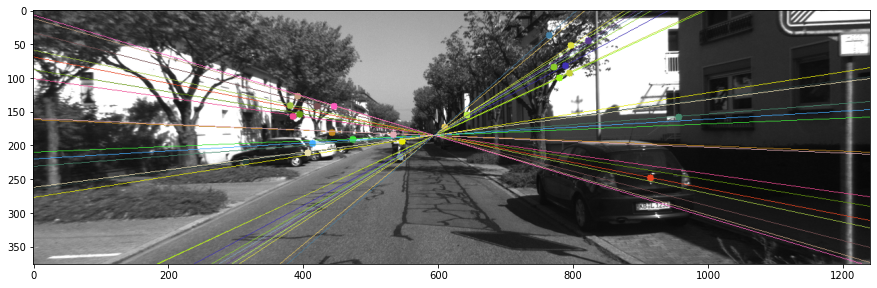

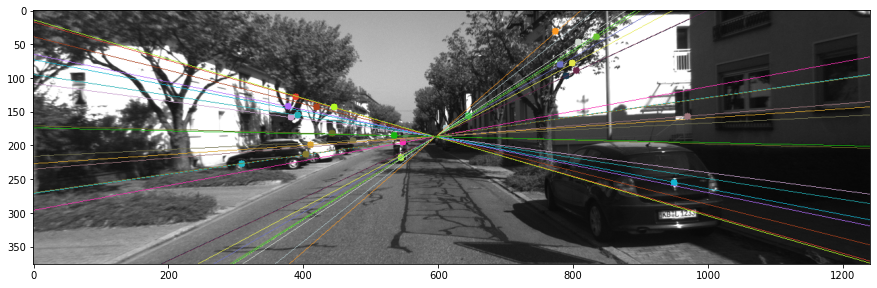

In [72]:
def drawlines(img1,img2,lines,pts1,pts2):
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

img1 = cv.imread('dataset/imLeft00.png',0)  
img2 = cv.imread('dataset/imLeft01.png',0)

#
kp1 = cv.goodFeaturesToTrack(img1, 25, 0.01, 10)
kp2, st, err = cv.calcOpticalFlowPyrLK(img1, img2, kp1, None)

# selecionando os melhores pontos
if kp2 is not None:
    pts1 = kp1[st==1]
    pts2 = kp2[st==1]
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

#
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# 
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.imshow(img5)
plt.show()
plt.imshow(img3)
plt.show()

### **2.2.2. Matriz Essencial**

A matriz Essencial é uma generalização da matriz Fundamental para o caso em que as câmeras estejam devidamente calibradas, ou seja, a matriz $\mathbf{\mathrm{K}}$ é conhecida. Um ponto $\mathbf{\mathrm{\hat{x}}}$ em **coordenadas normalizadas** pode ser obtido pela expressão $\mathbf{\mathrm{\hat{x}}}=\mathbf{\mathrm{K}}^{-1}\mathbf{\mathrm{x}}$. 

Sabendo que $\mathbf{\mathrm{x}}^{T} \mathbf{\mathrm{F}}  \mathbf{\mathrm{x}}'=0$  e que $ \mathbf{\mathrm{E}}= \mathbf{\mathrm{K}}^{‘T} \mathbf{\mathrm{F}} \mathbf{\mathrm{K}}$ podemos chegar na seguinte expressão $\mathbf{\mathrm{x}}^{‘T}\mathbf{\mathrm{K}}^{'-T} \mathbf{\mathrm{E}}\mathbf{\mathrm{K}}^{-1}\mathbf{\mathrm{x}}=0$. Deste modo, a correspondência de dois pontos em coordenadas de imagem normalizadas $\mathbf{\mathrm{\hat{x}}}\leftrightarrow \mathbf{\mathrm{\hat{x}}}'$ pode ser estabelecida pela seguinte expressão matemática

$\mathbf{\mathrm{\hat{x}}}^{T} \mathbf{\mathrm{E}}  \mathbf{\mathrm{\hat{x}}}'=0$

A matriz Essencial é uma matriz $3 \times 3$ com $6$ graus de liberdade, além de estabelecer as restrições na correspondência de pontos é possível extrair dela a pose (rotação e translação) relativa entre as duas imagens, com um fator de escala.  Isso é possível pela sua decomposição em valores singulares (SVD) em que $ \mathbf{\mathrm{E}}= \mathbf{\mathrm{U}}\Sigma \mathbf{\mathrm{V}}^{T}$. A partir da decomposição o vetor de translação e matriz de rotação podem ser obtidas das seguintes formas

$[\mathbf{\mathrm{t}}]_{\times}=\mathbf{\mathrm{U}}\mathbf{\mathrm{W}}\mathbf{\mathrm{\Sigma}}\mathbf{\mathrm{U}}^{T},~~\mathbf{\mathrm{R}}=\mathbf{\mathrm{U}}\mathbf{\mathrm{W}}^{-1}\mathbf{\mathrm{V}}^{T} ~~\mathrm{sendo}~~\mathbf{\mathrm{W}}=\begin{pmatrix}
0 & -1 & 0\\ 
1 & 0 & 0\\ 
0 & 0 & 1
\end{pmatrix}$

A decomposição acima não garante que $\mathbf{\mathrm{R}}$ seja de fato uma matriz de rotação (determinante igual a 1). Na verdade, existem quatro possibilidades de matrizes de rotação que satisfazem a decomposição SVD. 

$\mathbf{\mathrm{R}}=\pm \mathbf{\mathrm{U}}\mathbf{\mathrm{W}}^{-1}\mathbf{\mathrm{V}}^{T}~~e~~\mathbf{\mathrm{R}}=\pm \mathbf{\mathrm{U}}\mathbf{\mathrm{W}}\mathbf{\mathrm{V}}^{T}$

Além disso, não é possível estimar o sinal da direção da translação, portanto, na prática, é preciso fazer uma combinação das possíveis soluções e selecionar aquela em que a maioria dos pontos são vistos à frente das duas câmeras.  

### **2.2.3. Triangulação**

A triangulação ou reconstrução 3D é o processo de determinar a posição 3D de um ponto no mundo a partir das suas projeções nos planos de imagens. De posse de pelo menos duas projeções, a posição 3D desse ponto pode ser recuperada usando triangulação. 

Com base no que vimos até o momento, o que vocês fariam para obter esses dados? 

**Resposta:** 

Como visto anteriormente os raios projetantes que passam pelos pontos de imagem ($\mathbf{\mathrm{x}}$ e $\mathbf{\mathrm{x}}’$)e o centro das câmeras, estão sobre o mesmo plano e intersectam o mesmo ponto $\mathbf{\mathrm{X}}$ no espaço. Entretanto, devido a imperfeições construtivas da câmera e imprecisões na posição real das projeções, os elementos não definem uma geometria epipolar exata. Na prática, ao invés de identificar o ponto $\mathbf{\mathrm{X}}$ onde os raios se intersectam, busca-se pelo ponto $\mathbf{\mathrm{\hat{X}}}$ a uma distância média perpendicular às duas retas.

![triangulation](figures/triangulation.png)


Na prática é feito a busca pelo ponto $\mathbf{\mathrm{\hat{X}}}$ que minimiza o erro de reprojeção nas duas imagens. Sabendo que $\mathbf{\mathrm{\hat{x}}}=\mathbf{\mathrm{P}}\mathbf{\mathrm{\hat{X}}}$ o erro de reprojeção é obtido pelo produto cruzado $\mathbf{\mathrm{x}}\times\mathbf{\mathrm{P}}\mathbf{\mathrm{\hat{X}}}=\epsilon$. Deste modo formamos o sistema sistema linear

$ \begin{bmatrix}
x(\mathbf{\mathrm{p}}^{3T}\hat{\mathbf{\mathrm{X}}}) - (\mathbf{\mathrm{p}}^{1T}\hat{\mathbf{\mathrm{X}}})\\ 
y(\mathbf{\mathrm{p}}^{3T}\hat{\mathbf{\mathrm{X}}}) - (\mathbf{\mathrm{p}}^{2T}\hat{\mathbf{\mathrm{X}}})\\ 
x(\mathbf{\mathrm{p}}^{2T}\hat{\mathbf{\mathrm{X}}}) - y(\mathbf{\mathrm{p}}^{1T}\hat{\mathbf{\mathrm{X}}})
\end{bmatrix}= \mathbf{\epsilon}$

onde $\mathbf{\mathrm{p}}^{iT}$ representa a i-ésima linha da matriz $\mathbf{\mathrm{P}}$. O conjunto de equações acima constituem um sistema de rank 2, uma vez que somente duas delas são linearmente independentes. Assim a terceira linha pode ser desconsiderada e assim montamos o sistema linear completo $\mathbf{\mathrm{A}}\mathbf{\mathrm{\hat{X}}}=\epsilon$ considerando as duas imagens.

$
 A=\begin{bmatrix}
    x^{(e)}\mathbf{\mathrm{p}}^{(e)3T} - \mathbf{\mathrm{p}}^{(e)1T} \\ 
    y^{(e)}\mathbf{\mathrm{p}}^{(e)3T} - \mathbf{\mathrm{p}}^{(e)2T} \\ 
    x^{(d)}\mathbf{\mathrm{p}}^{(d)3T} - \mathbf{\mathrm{p}}^{(d)1T} \\ 
    y^{(d)}\mathbf{\mathrm{p}}^{(d)3T} - \mathbf{\mathrm{p}}^{(d)2T} 
    \end{bmatrix}
$

# **3. Desafio: Cálculo de mapa de disparidade**

A figura abaixo ilustra a projeção de um ponto em duas imagens de um par estéreo. A diferença entre as posições dos pontos projetados é denominada de disparidade e ela pode ser obtida pela semelhança de triângulos presente na figura 

$disp=\mathbf{\mathrm{x}}-\mathbf{\mathrm{x}}'= \frac{Bf}{Z}$

sendo $B$ denominado de $\textit{baseline}$ a distância entre os centros de câmera.

![disparity](figures/disparity.jpg)



## **3.1. Retificação estéreo**

A retificação de imagens estéreo é obtida através da aplicação de um conjunto de transformações geométricas sobre os planos de imagens, de forma que seus conjugados de linhas epipolares sejam colineares e paralelas a um dos eixos da imagem, normalmente o eixo horizontal. 

![stereo_rectify](figures/retification.png)

Qual a vantagem de aplicarmos essa transformação nas imagens?

**Resposta:**


## **3.2. Algoritmo de correspondência por blocos**


![sbm](figures/sbm.png)



```
BLOCK_SIZE = 5
SEARCH_BLOCK_SIZE = 64

def compare_blocks(y, x, block_left, right_array, block_size=5):
    """
    Compare left block of pixels with multiple blocks from the right
    image using SEARCH_BLOCK_SIZE to constrain the search in the right
    image.

    Args:
        y (int): row index of the left block
        x (int): column index of the left block
        block_left (numpy.ndarray): containing pixel values within the 
                    block selected from the left image
        right_array (numpy.ndarray]): containing pixel values for the 
                     entrire right image
        block_size (int, optional): Block of pixels width and height. 
                                    Defaults to 5.

    Returns:
        tuple: (y, x) row and column index of the best matching block 
                in the right image
    """
```




![sad](https://drive.google.com/uc?export=view&id=1R-HSFiaD9R5oDJENq9LXsbCIHtjFETFr)

```
def sum_of_abs_diff(pixel_vals_1, pixel_vals_2):
    """
    Args:
        pixel_vals_1 (numpy.ndarray): pixel block from left image
        pixel_vals_2 (numpy.ndarray): pixel block from right image

    Returns:
        float: Sum of absolute difference between individual pixels
    """
```

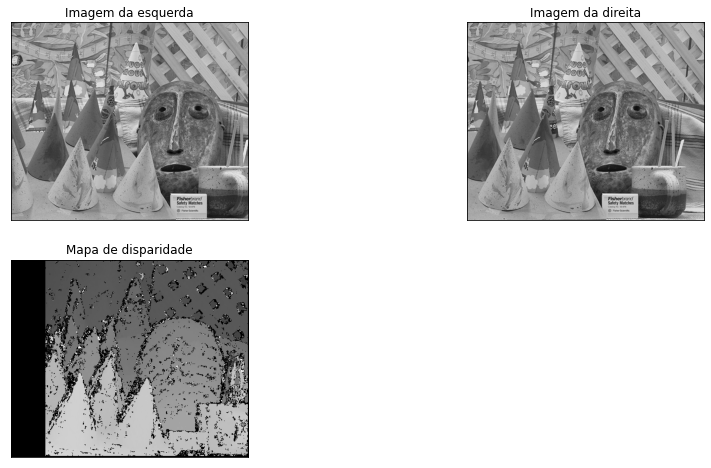

In [73]:
imgL = cv.imread('dataset/im2.ppm',0)
imgR = cv.imread('dataset/im6.ppm',0)

stereo = cv.StereoBM_create(numDisparities=64, blockSize=5)
disparity = stereo.compute(imgL,imgR)\

plt.subplot(2,2,1),plt.imshow(imgL,cmap = 'gray')
plt.title('Imagem da esquerda'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(imgR,cmap = 'gray')
plt.title('Imagem da direita'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(disparity,cmap = 'gray')
plt.title('Mapa de disparidade'), plt.xticks([]), plt.yticks([])
plt.show()